In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [50]:
##importamos los datos

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names = names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <BarContainer object of 36 artists>)

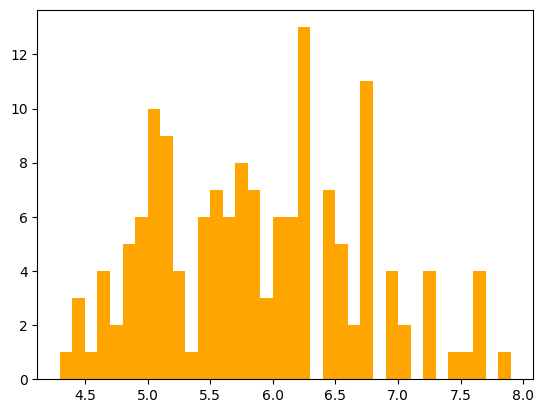

In [51]:
plt.hist(iris['sepal_length'],color= 'orange', bins= int(180/5))

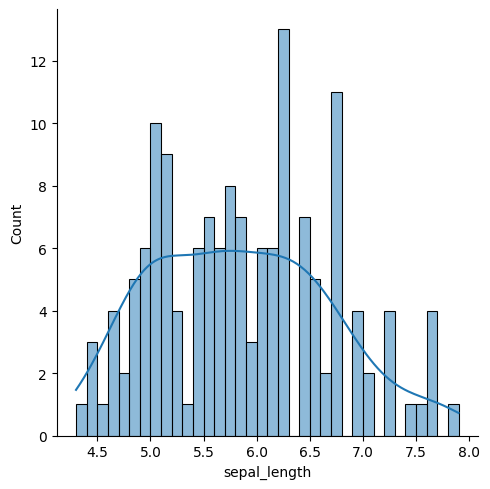

In [52]:
sns.displot(iris['sepal_length'], bins= int(180/5), kde=True)

In [53]:
##varianza
print(iris['sepal_length'].var())
##desviación standar
print(iris['sepal_length'].std())
##media
print(iris['sepal_length'].mean())


0.6856935123042507
0.828066127977863
5.843333333333334


In [54]:
##creación de una muestra media mediante el muestreo aleatorio simple
muestra = iris.sample(frac= 0.5)
muestra.head()

,sepal_length,sepal_width,petal_length,petal_width,class
142,5.8,2.7,5.1,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica


In [55]:
##varianza de la muestra
print(muestra['sepal_length'].var())
##desv.std
print(muestra['sepal_length'].std())
##mdia
print(muestra['sepal_length'].mean())


0.5913441441441443
0.7689890403277178
5.802666666666666


In [56]:
##intervalo de confianza
np.random.seed(20)
var1 = np.random.randint(0,10,10)
var2 = var1 + np.random.randint(0,10,10)
print(var1)
print(var2)


[3 9 4 6 7 2 0 6 8 5]
[ 6  9 10 12  7 11  5 13 13  7]


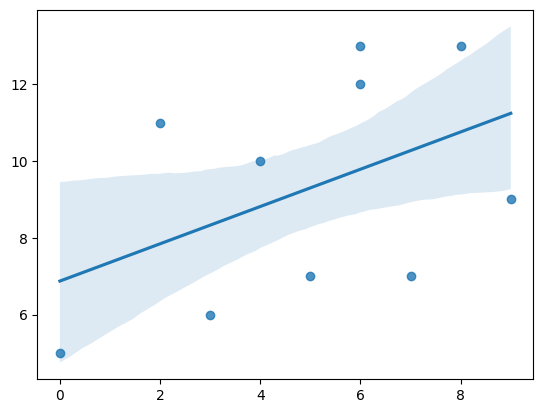

In [57]:
##visualizamos con un intervalo de confianza de 80%
grafico = sns.regplot(x=var1, y=var2, ci=80)

In [58]:
tuple = list(zip(var1,var2))
tabla = pd.DataFrame(tuple , columns=['Días_vacaciones','Dinero_generado'])
tabla

,Días_vacaciones,Dinero_generado
0,3,6
1,9,9
2,4,10
3,6,12
4,7,7
5,2,11
6,0,5
7,6,13
8,8,13
9,5,7


In [62]:
##función para intervalos de confianza
st.t.interval(confidence = 0.95, df = len(tabla)-1, loc = np.mean(tabla), scale = st.sem(tabla))

(array([5.15496491, 5.04269675]), array([9.14503509, 9.25730325]))